In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_file = '../Resources/COVID19_administrations.csv'
state_file = '../Resources/States Codes.csv'
output_file = '../Resources/Output_COVID_DATA.csv'
df = pd.read_csv(data_file)
df2 = pd.read_csv(state_file)
df_output = pd.read_csv(output_file)

C:\Users\dcurt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df2.head()

,Name,STATE
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
df.columns

Index(['State/Territory/Federal Entity', 'Total Doses Delivered',
       'Doses Delivered per 100K', '18+ Doses Delivered per 100K',
       'Total Doses Administered by State where Administered',
       'Doses Administered per 100k by State where Administered',
       '18+ Doses Administered by State where Administered',
       '18+ Doses Administered per 100K by State where Administered',
       'People with at least One Dose by State of Residence',
       'Percent of Total Pop with at least One Dose by State of Residence',
       'People 18+ with at least One Dose by State of Residence',
       'Percent of 18+ Pop with at least One Dose by State of Residence',
       'People Fully Vaccinated by State of Residence',
       'Percent of Total Pop Fully Vaccinated by State of Residence',
       'People 18+ Fully Vaccinated by State of Residence',
       'Percent of 18+ Pop Fully Vaccinated by State of Residence',
       'Total Number of Pfizer doses delivered',
       'Total Number of Mo

In [5]:
df.drop([
       '18+ Doses Delivered per 100K',
       'Doses Administered per 100k by State where Administered',
       '18+ Doses Administered by State where Administered',
       '18+ Doses Administered per 100K by State where Administered',
       'People with at least One Dose by State of Residence',
       'Percent of Total Pop with at least One Dose by State of Residence',
       'People 18+ with at least One Dose by State of Residence',
       'Percent of 18+ Pop with at least One Dose by State of Residence',
       'Total Number of Pfizer doses delivered',
       'Total Number of Moderna doses delivered',
       'Total Number of Janssen doses delivered',
       'Total Number of Janssen doses administered',
       'Total Number of Moderna doses administered',
       'Total Number of Pfizer doses adminstered',
       'Total Number of doses from unknown manufacturer delivered',
       'Total Number of doses from unknown manufacturer administered',
       'People Fully Vaccinated Unknown 2-dose manufacturer Resident',
       'People 18+ Fully Vaccinated Unknown 2-dose manufacturer Resident',
       'People with 2 Doses by State of Residence',
       'Percent of Total Pop with 1+ Doses by State of Residence',
       'People 18+ with 1+ Doses by State of Residence',
       'Percent of 18+ Pop with 1+ Doses by State of Residence',
       'Percent of Total Pop with 2 Doses by State of Residence',
       'People 18+ with 2 Doses by State of Residence',
       'Percent of 18+ Pop with 2 Doses by State of Residence',
       'People with 1+ Doses by State of Residence',
       'People 65+ with at least One Dose by State of Residence',
       'Percent of 65+ Pop with at least One Dose by State of Residence',
       'People 65+ Fully Vaccinated_Unknown 2-dose Manuf_Resident',
       '65+ Doses Administered by State where Administered',
       'Doses Administered per 100k of 65+ pop by State where Administered',
       'Doses Delivered per 100k of 65+ pop',
       'People 12+ with at least One Dose by State of Residence',
       'Percent of 12+ Pop with at least One Dose by State of Residence',
       'People 12+ Fully Vaccinated_Unknown 2-dose Manuf_Resident',
       '12+ Doses Administered by State where Administered',
       'Doses Administered per 100k of 12+ pop by State where Administered',
       'Doses Delivered per 100k of 12+ pop'],axis=1, inplace=True)

In [6]:
df.shape

(63, 24)

In [7]:
df.drop('Doses Delivered per 100K',axis=1,inplace=True)

In [8]:
df.shape

(63, 23)

In [9]:
# df.to_csv('../Resources/COVID_ADMIN_DATA.csv', index=False, header=True)

In [10]:
df.rename(columns = {'State/Territory/Federal Entity': 'Name'},inplace=True)
df3 = pd.merge(df,df2,how='inner',on='Name')

In [11]:
df3.to_csv('../Resources/COVID_ADMIN_DATA.csv', index=False, header=True)
df3.shape

(49, 24)

In [12]:
m_total_vac = df3['People Fully Vaccinated Moderna Resident'].sum()
p_total_vac = df3['People Fully Vaccinated Pfizer Resident'].sum()
j_total_vac = df3['People Fully Vaccinated Janssen Resident'].sum()

In [13]:
df_output.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA',
       'NJ', 'LA', nan, 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK',
       'AR', 'ID', 'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT',
       'DE', 'AL', 'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM',
       'OR', 'PR', 'KY', 'ND', 'SC', 'VT', 'DC', 'SD', 'WY', 'XB', 'VI',
       'Ca', 'GU', 'AS', 'MP', 'MH', 'FM', 'XV', 'Tx', 'QM'], dtype=object)

In [14]:
df_output['STATE'] = df_output['STATE'].str.upper()
df_output.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA',
       'NJ', 'LA', nan, 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK',
       'AR', 'ID', 'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT',
       'DE', 'AL', 'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM',
       'OR', 'PR', 'KY', 'ND', 'SC', 'VT', 'DC', 'SD', 'WY', 'XB', 'VI',
       'GU', 'AS', 'MP', 'MH', 'FM', 'XV', 'QM'], dtype=object)

In [15]:
df_merge = pd.merge(df_output,df3, on='STATE',how='inner')


In [16]:
df_merge.to_csv('../Resources/Temporary_Output.csv')

In [17]:
df_merge.shape

(214315, 35)

In [18]:
df_merge.STATE.unique()

array(['TX', 'CA', 'WA', 'NV', 'KS', 'OH', 'TN', 'VA', 'NC', 'GA', 'NJ',
       'LA', 'IL', 'MD', 'ME', 'MA', 'MI', 'CT', 'FL', 'OK', 'AR', 'ID',
       'PA', 'IN', 'AZ', 'MN', 'NH', 'MO', 'CO', 'NE', 'UT', 'DE', 'AL',
       'MT', 'RI', 'MS', 'IA', 'AK', 'HI', 'WV', 'WI', 'NM', 'OR', 'KY',
       'ND', 'SC', 'VT', 'SD', 'WY'], dtype=object)

In [19]:
df_merge['DIED'] = df_merge['DIED'].replace(np.nan,'N')

In [20]:
df_merge['DIED'].head()

0    N
1    N
2    N
3    N
4    N
Name: DIED, dtype: object

In [21]:
df_merge['DIED'].unique()

array(['N', 'Y'], dtype=object)

In [22]:
df_merge.groupby(['VAX_NAME','SEX','DIED']).describe()

VAERS_ID                \
                                                count          mean   
VAX_NAME                            SEX DIED                          
COVID19 (COVID19 (JANSSEN))         F   N     18822.0  1.201053e+06   
                                        Y       125.0  1.223048e+06   
                                    M   N      9026.0  1.210359e+06   
                                        Y       144.0  1.221445e+06   
                                    U   N       776.0  1.232973e+06   
                                        Y         9.0  1.252164e+06   
COVID19 (COVID19 (MODERNA))         F   N     78703.0  1.049802e+06   
                                        Y       717.0  1.131367e+06   
                                    M   N     22399.0  1.073293e+06   
                                        Y       884.0  1.119813e+06   
                                    U   N      2448.0  9.904073e+05   
                                        Y        13.0  1.177837e+06   
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     58066.0  1.062026e+06   
                                        Y       644.0  1.121502e+06   
                                    M   N     19981.0  1.092863e+06   
                                        Y       676.0  1.126505e+06   
                                    U   N       848.0  1.073530e+06   
                                        Y        34.0  1.117797e+06   

                                                                        \
                                                        std        min   
VAX_NAME                            SEX DIED                             
COVID19 (COVID19 (JANSSEN))         F   N      62782.191144  1070055.0   
                                        Y      56462.845020  1102815.0   
                                    M   N      65291.712639  1070546.0   
                                        Y      56885.766601  1093939.0   
                                    U   N      44195.491997  1079511.0   
                                        Y      57306.534051  1157515.0   
COVID19 (COVID19 (MODERNA))         F   N      86506.624859   916600.0   
                                        Y     108760.812173   917790.0   
                                    M   N      93489.670580   916607.0   
                                        Y     109591.240981   917117.0   
                                    U   N      58759.533722   917000.0   
                                        Y      84996.902564  1034985.0   
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     102979.767030   916602.0   
                                        Y     115519.792431   918388.0   
                                    M   N     109108.410024   916638.0   
                                        Y     116998.035568   918418.0   
                                    U   N     123007.204253   917480.0   
                                        Y     126013.404686   955879.0   

                                                                     \
                                                     25%        50%   
VAX_NAME                            SEX DIED                          
COVID19 (COVID19 (JANSSEN))         F   N     1164765.50  1203012.0   
                                        Y     1188040.00  1223378.0   
                                    M   N     1174001.00  1205819.0   
                                        Y     1200988.50  1215401.0   
                                    U   N     1206571.75  1236282.5   
                                        Y     1227927.00  1276508.0   
COVID19 (COVID19 (MODERNA))         F   N      979523.50  1041119.0   
                                        Y     1047183.00  1123247.0   
                                    M   N      998746.00  1071667.0   
                                        Y     1033084.50  1106759.0   
                                    U   N      963865.75   975137.5   
    

In [23]:
death = pd.DataFrame(df_merge.groupby(['VAX_NAME','SEX','DIED'])['DIED'].count())

In [24]:
j_f_death = death['DIED'][1]
j_m_death = death['DIED'][3]

m_f_death = death['DIED'][7]
m_m_death = death['DIED'][9]

p_f_death = death['DIED'][13]
p_m_death = death['DIED'][15]

In [25]:
death

DIED
VAX_NAME                            SEX DIED       
COVID19 (COVID19 (JANSSEN))         F   N     18822
                                        Y       125
                                    M   N      9026
                                        Y       144
                                    U   N       776
                                        Y         9
COVID19 (COVID19 (MODERNA))         F   N     78703
                                        Y       717
                                    M   N     22399
                                        Y       884
                                    U   N      2448
                                        Y        13
COVID19 (COVID19 (PFIZER-BIONTECH)) F   N     58066
                                        Y       644
                                    M   N     19981
                                        Y       676
                                    U   N       848
                                        Y        34

In [26]:
j_m_mortality_rate = j_m_death / j_total_vac
print(j_m_mortality_rate)
j_f_mortality_rate = j_f_death / j_total_vac
print(j_f_mortality_rate)

m_m_mortality_rate = m_m_death / m_total_vac
print(m_m_mortality_rate)
m_f_mortality_rate = m_f_death / m_total_vac
print(m_f_mortality_rate)

p_m_mortality_rate = p_m_death / p_total_vac
print(p_m_mortality_rate)
p_f_mortality_rate = p_f_death / p_total_vac
print(p_f_mortality_rate)

1.4627128590033176e-05
1.2697160234403798e-05
1.728585383797676e-05
1.4020313576730018e-05
1.0483365333961094e-05
9.987111353655244e-06


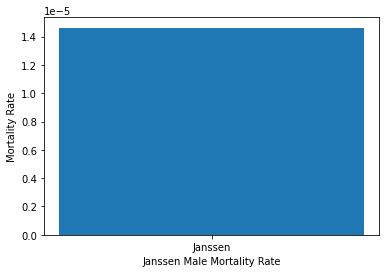

In [27]:
plt.bar('Janssen', j_m_mortality_rate)
plt.xlabel('Janssen Male Mortality Rate')
plt.ylabel('Mortality Rate')
plt.show()

In [44]:
mortality_df = pd.DataFrame({
    'Vaccine Type': ['Janssen', 'Moderna', 'Pfizer'],
    'Male': [j_m_mortality_rate, m_m_mortality_rate, p_m_mortality_rate],
    'Female': [j_f_mortality_rate, m_f_mortality_rate ,p_f_mortality_rate]
})

<AxesSubplot:xlabel='Vaccine Type'>

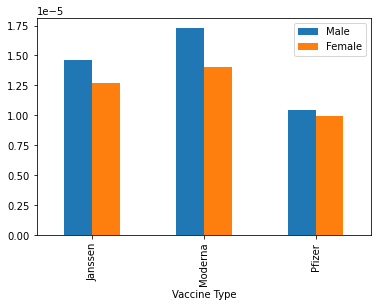

In [45]:
mortality_df.plot.bar(x='Vaccine Type')

Text(0, 0.5, 'Mortality Rate')

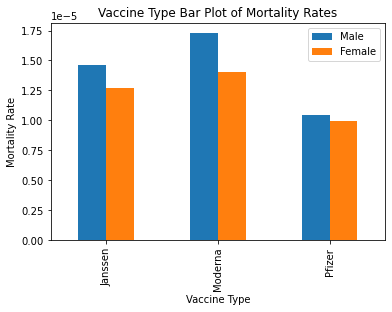

In [46]:
barplot2_data = mortality_df.groupby(['Vaccine Type']).sum()
barplot2 = barplot2_data.plot.bar(title='Vaccine Type Bar Plot of Mortality Rates')
barplot2.set_xlabel('Vaccine Type')
barplot2.set_ylabel('Mortality Rate')

In [48]:
mortality_df.groupby(['Vaccine Type']).sum()

,Male,Female
Vaccine Type,,
Janssen,0.000015,0.000013
Moderna,0.000017,0.000014
Pfizer,0.000010,0.000010
